Link to Tableau Analysis
https://public.tableau.com/authoring/Capstone2_16747962668290/Dashboard1#1

Using Tableau I try to give an overall picture of what my analsis has shown. I provided high level numbers, a bar chart showing income by age group, a stacked bar chart showing all married borrowers by occupation and age, a circle view of the percentage of family status among clients, a pareto analysis of the percentage of total income by age group. 

You can interact with the delinquent plus 90 days chart at the top

# Credit Approval Analysis

Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page


## The story behind The Data

Credit score cards are a common risk control method in the financial industry. 
The industry uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. 
The bank is able to decide whether to issue a credit card to the applicant. 
Credit scores can objectively quantify the magnitude of risk. 
As such, in this scenario, our bank HereIsTheMoney would like to find out what are the main factors that allow them to approve or deny a credit card to a client, and ultimately have an automated logic to identify these cases before they come to light, thus saving costs as well as increasing its reputation at the same time.

**A full ERD can be found [here](https://dbdiagram.io/d/638ce1b7bae3ed7c45449f75)**

# Data Description
In this task, few datasets are provided:

1. **`application_record.csv` -** this file contains appliers personal information, which you could use as features for data enrichment, in order to get better insights on the business use-case. The file contains ~438K records, and 18 columns.
The relevant columns this file has are:

	- `ID` - client number. Unique identifier for the customer holding the account
    - `AMT_INCOME_TOTAL` - annual income
    - `NAME_INCOME_TYPE` - income category
    - `NAME_EDUCATION_TYPE` - education level
    - `NAME_FAMILY_STATUS` - martial status
    - `NAME_HOUSING_TYPE` - way of living
    - `DAYS_BIRTH` - Count backwards from current day (0), -1 means yesterday
    - `DAYS_EMPLOYED` - Start date of employment; Count backwards from current day(0). If positive, person unemployed.
    - `OCCUPATION_TYPE` - Occupation
    
2. **`credit_record.csv` -** contains records users transactions of credit card. This dataset contains ~200K transactions, and has 3 columns:

    - `ID` - Client number
    - `MONTHS_BALANCE` - Record month; The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
    - `STATUS` - Status; A mapping column between a numerical value, and a range of time past due. Specifically - 0: 1-29 days past due; 1: 30-59 days past due; 2: 60-89 days overdue; 3: 90-119 days overdue; 4: 120-149 days overdue; 5: Overdue or bad debts, write-offs for more than 150 days; C: paid off that month X: No loan for the month

3. **`enriched_demographics_client.csv`** - this dataset contains some additional demographic information about each client. Specifically, it contains:
 
     - `ID` - Client number
     - `CODE_GENDER` - M (male) / F (female) of the client’s identity
     - `CNT_CHILDREN` - number of children
     - `CNT_FAM_MEMBERS` - Family size

4. ****`enriched_flags_client.csv`**** - this dataset contains some additional flags about each client. Specifically, it contains:
    - `ID` - Client number
    - `FLAG_MOBIL` - Is there a mobile phone
    - `FLAG_WORK_PHONE` - Is there a work phone
    - `FLAG_PHONE` - Is there a phone
    - `FLAG_EMAIL` - Is there an email
    - `FLAG_OWN_CAR` - Y (yes) / N (no) flag indicates if the client has a car
    - `FLAG_OWN_REALTY` - Y(yes) / N (no) indicates if the client has a property

# SQL tasks

1. How many clients that have more then 2 children does the bank have?
2. What is the average family size per each occupation type (based on fam_members)?
3. Out of the men clients, what is the count of transaction that were made, per each fam_member value (hint: treat fam_members as a dimension, not a metric)?
4. The bank is interested in knowing per each “status” (see above), who are the client IDs with top-5 highest AMT_INCOME_TOTAL, as well as the bottom-5 lowest AMT_INCOME_TOTAL. Please help him find that.
5. Let’s define a new column called “has_car_and_realty”. The bank thinks these people are affluent compared to others. Its logic is as follows:
- If flag_own_car = 1 and flag_own_realty = 1 ⇒ 1
- else ⇒ 0
Once we have this column, the bank would like to know per each has_car_and_realty category:

    1. how many unique clients do we have, 
    2. as well as how many transactions each category (1, 0) have had, 
    3. and what is the ratio between the two: unique_clients / num_transactions

## Tableau Tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualisations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - Number of bank clients
    - % of clients with higher education
    - etc.
2. **A Bar Chart**, for example, comparing the number of clients in each client segment (custom defined as a combination of demographic characteristics).
3. **A Stacked Bar Chart with Quick Table Calculation**, for example, for each Family Status comparing the ratio of car owners and non-car owners.
4. **A Highlight Table (Heatmap)**, for example, between education and income level (can be custom-defined based on Amt Income Total), where each cell corresponds to absolute or relative numbers of clients in each combination. 
5. **A Circle View** with three different values on X axis, Y axis, and Size.
6. **A Pareto Analysis** based on a custom-defined **client segment** to answer a question: Which client segments make up 80% of all client base? 
    - Segment can include values from the demographic and/or record information about the client. For example, Education | Income | Marital status | Owning a car | No children.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard.
8. At least **1 more visualization of your choice** adding value to your analysis.

_Use this cell to add your Tableau links. We encourage you also to add here screenshots from your Tableau dashboard with explanations._


_For_ deep dive analysis and EDA follow the guidelines on project [Page](https://cms.master.school/final-project-jan23)

In [1]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [9]:
# Load data first and see its "head"
application_record_df = pd.read_csv("application_record.csv")
credit_record_df = pd.read_csv("credit_record.csv")
enriched_demographics_client_df = pd.read_csv("enriched_demographics_client.csv")
enriched_flags_client_df = pd.read_csv("enriched_flags_client.csv")

In [18]:
application_record_df.head(3)

,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE
0,-4542,Civil marriage,-12005,Rented apartment,5008804,Higher education,NaN,427500.0,Working
1,-4542,Civil marriage,-12005,Rented apartment,5008805,Higher education,NaN,427500.0,Working
2,-1134,Married,-21474,House / apartment,5008806,Secondary / secondary special,Security staff,112500.0,Working


In [19]:
enriched_flags_client_df.head(3)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
0,5008804,Y,Y,1,1,0,0
1,5008805,Y,Y,1,1,0,0
2,5008806,Y,Y,1,0,0,0


In [20]:
enriched_demographics_client_df.head(3)

,ID,CODE_GENDER,CNT_CHILDREN,CNT_FAM_MEMBERS
0,5008804,M,0,2
1,5008805,M,0,2
2,5008806,M,0,2


In [21]:
/*How many clients that have more then 2 children does the bank have?*/

SELECT count(*) FROM enriched_demographics_client where cnt_children >= 2;

,count
0,45959


In [7]:
/* What is the average family size per each occupation type (based on fam_members)? */
with v as (SELECT a.id, a.occupation_type, a.occupation_type as t,  ed.cnt_fam_members as w, ed.cnt_fam_members FROM application_record a
JOIN 
enriched_demographics_client ed
ON
a.id = ed.id

)
select occupation_type, sum(w) as cnt_fam,(select count(occupation_type) from v) as count_of_occ,  sum(w)/(select count(occupation_type) from v) as avg_fam_by_occ from v
GROUP BY
occupation_type


,occupation_type,cnt_fam,count_of_occ,avg_fam_by_occ
0,None,263053,304422,0.864106
1,IT staff,1192,304422,0.003916
2,Cleaning staff,12103,304422,0.039757
3,Cooking staff,18153,304422,0.059631
4,Accountants,36186,304422,0.118868
5,HR staff,1564,304422,0.005138
6,Managers,82092,304422,0.269665
7,Drivers,62820,304422,0.206358
8,Secretaries,4597,304422,0.015101
9,High skill tech staff,38810,304422,0.127488


In [1]:

/*  Out of the men clients, what is the count of transactions made per each fam_member value (hint: treat fam_members as a dimension, not a metric)? */

with males as(
    SELECT DISTINCT id as male_ids, cnt_fam_members FROM enriched_demographics_client WHERE code_gender = 'M'
    ),
trans as(
    Select id, count(id) as counted from credit_record
    group by
    id
)

SELECT male_ids,counted, cnt_fam_members, (counted/cnt_fam_members) as tran_per_fam_member from trans
JOIN
males
ON
males.male_ids = trans.id

,male_ids,counted,cnt_fam_members,tran_per_fam_member
0,5092133,4,2,2
1,5125432,4,2,2
2,5136984,9,1,9
3,5009276,4,2,2
4,5112733,10,2,5
...,...,...,...,...
10783,5148602,2,2,1
10784,5142964,11,3,3
10785,5024063,5,5,1
10786,5096079,1,3,0


In [7]:
/*  The bank is interested in knowing, per each “status” (see above), who are the client IDs with the top-5 highest AMT_INCOME_TOTAL, as well as the bottom-5 lowest AMT_INCOME_TOTAL. Please help him find that.
  */

with d as(
    SELECT DISTINCT a.id, a.status, b.amt_income_total from credit_record a
JOIN
application_record b
ON
a.id = b.id
)
SELECT * FROM (
SELECT id, status, amt_income_total, row_number() OVER(PARTITION BY status order by amt_income_total DESC) as Ranking from d
) dd
WHERE ranking <= 5

,id,status,amt_income_total,ranking
0,5143234,0,1575000.0,1
1,5143235,0,1575000.0,2
2,5143232,0,1575000.0,3
3,5143236,0,1575000.0,4
4,5143237,0,1575000.0,5
5,5009695,1,1350000.0,1
6,5009694,1,1350000.0,2
7,5025201,1,1125000.0,3
8,5079018,1,900000.0,4
9,5079016,1,900000.0,5


In [4]:
/* add a column called “has_car_and_realty”. populate the field based on this logic "If flag_own_car = 1 and flag_own_realty = 1 ⇒ 1
else ⇒ 0" */

alter table enriched_flags_client add column has_car_and_realty int

-- SELECT id, flag_email,
-- CASE
--     WHEN flag_own_car = 1 AND flag_own_realty = 1 THEN 1
--     WHEN flag_own_car = 0 AND flag_own_realty = 1 THEN 0
--     WHEN flag_own_car = 1 AND flag_own_realty = 0 THEN 0
--     WHEN flag_own_car = 0 AND flag_own_realty = 0 THEN 0

-- END has_car_and_realty
-- FROM enriched_flags_client

""


In [13]:
-- I had to alter the table again to change the car and realty column to be a char

ALTER TABLE enriched_flags_client
ALTER COLUMN has_car_and_realty TYPE char;

""


In [24]:
SELECT id, flag_email,
CASE
    WHEN flag_own_car = 'Y' AND flag_own_realty = 'Y' THEN '1'
    WHEN flag_own_car = 'N' AND flag_own_realty = 'Y' THEN '0'
    WHEN flag_own_car = 'Y' AND flag_own_realty = 'N' THEN '0'
    WHEN flag_own_car = 'N' AND flag_own_realty = 'N' THEN '0'

END has_car_and_realty
FROM enriched_flags_client

,id,flag_email,has_car_and_realty
0,6008171,0,0
1,6008172,0,0
2,6008173,0,0
3,6008174,0,0
4,6008175,0,0
...,...,...,...
438552,6398074,0,0
438553,6398075,0,0
438554,5971594,0,0
438555,5971595,0,0


In [1]:
/* per each has_car_and_realty category, how many unique clients we have? */
with q5 as (
SELECT id, flag_email,
    CASE
        WHEN flag_own_car = 'Y' AND flag_own_realty = 'Y' THEN '1'
        WHEN flag_own_car = 'N' AND flag_own_realty = 'Y' THEN '0'
        WHEN flag_own_car = 'Y' AND flag_own_realty = 'N' THEN '0'
        WHEN flag_own_car = 'N' AND flag_own_realty = 'N' THEN '0'

    END has_car_and_realty
FROM enriched_flags_client
)
Select has_car_and_realty, count(has_car_and_realty) from q5
group by
has_car_and_realty



,has_car_and_realty,count
0,0,325601
1,1,112956


In [35]:
/*  per each has_car_and_realty category, how many transactions each category (1, 0) has had?  */

with q5 as (
SELECT id, flag_email,
    CASE
        WHEN flag_own_car = 'Y' AND flag_own_realty = 'Y' THEN '1'
        WHEN flag_own_car = 'N' AND flag_own_realty = 'Y' THEN '0'
        WHEN flag_own_car = 'Y' AND flag_own_realty = 'N' THEN '0'
        WHEN flag_own_car = 'N' AND flag_own_realty = 'N' THEN '0'

    END has_car_and_realty
FROM enriched_flags_client
), 
trans as (
    select id,  count(id) as cnt from credit_record
    group by
    id

)
Select  q.has_car_and_realty, sum(cnt) as tot_trans from q5 q
JOIN
trans t
ON
q.id = t.id

GROUP by
q.has_car_and_realty


,has_car_and_realty,tot_trans
0,0,116004
1,1,39512


In [4]:
/*  what is the ratio between the two: unique_clients / num_transactions
*/
with tt as (
    with q5 as (
        SELECT id, flag_email,
            CASE
                WHEN flag_own_car = 'Y' AND flag_own_realty = 'Y' THEN '1'
                WHEN flag_own_car = 'N' AND flag_own_realty = 'Y' THEN '0'
                WHEN flag_own_car = 'Y' AND flag_own_realty = 'N' THEN '0'
                WHEN flag_own_car = 'N' AND flag_own_realty = 'N' THEN '0'

            END has_car_and_realty
        FROM enriched_flags_client
    ), 
    trans as (
        select id,  count(id) as cnt from credit_record
        group by
        id

    )
    Select  q.has_car_and_realty, sum(cnt) as tot_trans from q5 q
    JOIN
    trans t
    ON
    q.id = t.id

    GROUP by
    q.has_car_and_realty
),
bb as (
    with q5 as (
    SELECT id, flag_email,
        CASE
            WHEN flag_own_car = 'Y' AND flag_own_realty = 'Y' THEN '1'
            WHEN flag_own_car = 'N' AND flag_own_realty = 'Y' THEN '0'
            WHEN flag_own_car = 'Y' AND flag_own_realty = 'N' THEN '0'
            WHEN flag_own_car = 'N' AND flag_own_realty = 'N' THEN '0'

        END has_car_and_realty
    FROM enriched_flags_client
    )
    Select has_car_and_realty, count(has_car_and_realty) as trans_count from q5
    group by
    has_car_and_realty

)
Select trans_count/tot_trans as ratio from tt t
JOIN
bb b
ON
t.has_car_and_realty = b.has_car_and_realty

,ratio
0,2.806808
1,2.858777


In [12]:
ns = credit_record_df[credit_record_df['STATUS']=='C']
ns.head()


,ID,MONTHS_BALANCE,STATUS
2,5053982,-13,C
3,5023377,-5,C
4,5137190,-7,C
7,5137043,-6,C
8,5054354,-11,C


In [6]:
# how many unique ID in application record?
len(set(application_record_df['ID']))

NameError: name 'application_record_df' is not defined

In [7]:
# how many unique ID in credit record?
len(set(credit_record_df['ID']))

In [8]:
# how many IDs do two tables share?
len(set(application_record_df['ID']).intersection(set(credit_record_df['ID'])))

In [9]:
# One can think of mergine the two DFs

df = pd.merge(application_record_df, credit_record_df, how='inner', on=['ID'])

In [10]:
# Let's see all columns after merge of two DFs
df.columns

In [11]:
enriched_flags_client_df['FLAG_OWN_CAR'].value_counts().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')
# Seems that ~63% of the clients doesn't own a car...

In [12]:
enriched_demographics_client_df['CNT_CHILDREN'].value_counts().plot(kind='pie', shadow=True, autopct='%1.1f%%')
# ~70% doesn't have even a child

In [13]:
# Let's deep dive into the values
enriched_demographics_client_df['CNT_CHILDREN'].value_counts()

In [14]:
# QUESTION 1
children_2 = enriched_demographics_client_df[enriched_demographics_client_df['CNT_CHILDREN'] > 2]
res = children_2.shape[0]
print(f'The bank has {res} that have more than 2 children'.format(res))

NameError: name 'enriched_demographics_client_df' is not defined

In [15]:
#Question 2
q2 = application_record_df.merge(enriched_demographics_client_df,how='outer', on='ID')
q2.groupby(by='OCCUPATION_TYPE')['CNT_FAM_MEMBERS'].mean().round(decimals=2)

In [16]:
#Question 3
q4_2 = q2[q2['CODE_GENDER'] == 'M']

q2.groupby(by='ID', group_keys=True).count().apply(lambda X: X/q4_2['CNT_FAM_MEMBERS'].max())



In [17]:
#Question 4

q4 = application_record_df.merge(credit_record_df, 'outer' )
print("IDs for top 5 clients ith highest income per status", q4.groupby('STATUS')['AMT_INCOME_TOTAL'].nlargest(5))
print("IDs for top 5 clients ith lowest income per status", q4.groupby('STATUS')['AMT_INCOME_TOTAL'].nsmallest(5))

In [18]:
#Question 5
count = 0
enriched_flags_client_df['has_car_and_realty'] = ''
for index, row in enriched_flags_client_df.iterrows():
    if row['FLAG_OWN_CAR'] == 'Y':
        if row['FLAG_OWN_REALTY'] == 'Y':
            count += 1
            enriched_flags_client_df.loc[index, 'has_car_and_realty' ] = 1
        else:
            enriched_flags_client_df.loc[index, 'has_car_and_realty' ] = 0
    else:
         enriched_flags_client_df.loc[index, 'has_car_and_realty' ] = 0   
print("Below are the totals of clients in each or the has_car_and_realty categories ", enriched_flags_client_df['has_car_and_realty'].value_counts())

In [19]:
#Question 5.1
zeros = enriched_flags_client_df[enriched_flags_client_df['has_car_and_realty'] == 0]
zeros_cnt = len(zeros['ID'].unique())
ones = enriched_flags_client_df[enriched_flags_client_df['has_car_and_realty'] == 1]
ones_cnt = len(ones['ID'].unique())
print("you have {} clients that do not have a car and realty and {} that do".format(zeros_cnt, ones_cnt))

In [20]:
print(enriched_flags_client_df.shape)
print(credit_record_df.shape)

In [21]:
#Question 5.2
five_2_df = enriched_flags_client_df.merge(credit_record_df, 'outer')

ted = five_2_df.groupby('has_car_and_realty')['STATUS'].count()

print("The number of transactions is:","\n","O: {} and 1: {}".format(ted[0], ted[1]))



In [22]:
#Question 5.3
print("The ratio between unique clients and number of transactions is:","\n","O: {} and 1: {}".format(ted[0]/zeros_cnt, ted[1]/ones_cnt))

In [5]:

#creating a final dataframe to use in the EDA process

tables = [enriched_flags_client_df, enriched_demographics_client_df,credit_record_df, application_record_df]

for x in range(len(tables)):
    final = pd.merge(tables[x-1],tables[x], left_index=True, right_index=True, how='outer')

  

In [7]:
#outliers decection ID_x column

print(final['ID_x'].isnull().any())
print(final['ID_x'].isnull().sum())

#There are 228842 records with Nan as the ID. I will replace NaN with a value of 999999.9 so there is a float number to represent a missing value

final['ID_x'].replace(np.nan, 999999,inplace = True)

print("After replacing values, the count of nulls is: ", final['ID_x'].isnull().sum())

True
228842
After replacing values, the count of nulls is:  0


In [15]:
#outliers decection MONTHS_BALANCE column

print(final['MONTHS_BALANCE'].isnull().any())
print(final['MONTHS_BALANCE'].isnull().sum())

#There are 228842 records with Nan as the Months Balance. I will replace NaN with a value of 0 so there is a float number representing a value

final['MONTHS_BALANCE'].replace(np.nan, 0,inplace = True)

print("After replacing values, the count of nulls is: ", final['MONTHS_BALANCE'].isnull().sum())



In [36]:
#outliers decection STATUS column

print(final['STATUS'].isnull().any())
print(final['STATUS'].isnull().sum())

#There are 228842 records with Nan as the Status. I will replace NaN with a value of 'X' since these rows do not have a loan for that month

final['STATUS'].replace(np.nan, 'X',inplace = True)

print("After replacing values, the count of nulls is: ", final['STATUS'].isnull().sum())

True
228842
After replacing values, the count of nulls is:  0


In [ ]:
#outliers decection STATUS column

print(final['STATUS'].isnull().any())
print(final['STATUS'].isnull().sum())

#There are 228842 records with Nan as the Status. I will replace NaN with a value of 'X' since these rows do not have a loan for that month

final['STATUS'].replace(np.nan, 'X',inplace = True)

print("After replacing values, the count of nulls is: ", final['STATUS'].isnull().sum())

In [40]:
#outliers decection NAME_FAMILY_STATUS column

print(final['NAME_FAMILY_STATUS'].isnull().any())
print(final['NAME_FAMILY_STATUS'].isnull().sum())
print(final['NAME_FAMILY_STATUS'].value_counts())

#Everything in this column looks good so we will move on

In [44]:
#outliers decection DAYS_BIRTH column

print(final['DAYS_BIRTH'].isnull().any())
print(final['DAYS_BIRTH'].isnull().sum())
print(final['DAYS_BIRTH'].value_counts())

#Everything in this column looks good so we will move on

In [45]:
#outliers decection NAME_HOUSING_TYPE column

print(final['NAME_HOUSING_TYPE'].isnull().any())
print(final['NAME_HOUSING_TYPE'].isnull().sum())
print(final['NAME_HOUSING_TYPE'].value_counts())

#Everything in this column looks good so we will move on

In [46]:
#outliers decection ID_y column

print(final['ID_y'].isnull().any())
print(final['ID_y'].isnull().sum())
print(final['ID_y'].value_counts())

#Everything in this column looks good so we will move on

In [49]:
#outliers decection NAME_EDUCATION_TYPE column

print(final['NAME_EDUCATION_TYPE'].isnull().any())
print(final['NAME_EDUCATION_TYPE'].isnull().sum())
print(final['NAME_EDUCATION_TYPE'].value_counts())

#Everything in this column looks good so we will move on

In [51]:
#outliers decection OCCUPATION_TYPE column

print(final['OCCUPATION_TYPE'].isnull().any())
print(final['OCCUPATION_TYPE'].isnull().sum())
print(final['OCCUPATION_TYPE'].value_counts())

#there are 134203 rows that have no occupation. We will set those columns to 'no occupation'
final['OCCUPATION_TYPE'].replace(np.nan, 'no occupation',inplace = True)

print("After replacing values, the count of nulls is: ", final['OCCUPATION_TYPE'].isnull().sum())


In [52]:
#outliers decection AMT_INCOME_TOTAL column

print(final['AMT_INCOME_TOTAL'].isnull().any())
print(final['AMT_INCOME_TOTAL'].isnull().sum())
print(final['AMT_INCOME_TOTAL'].value_counts())

#Everything in this column looks good so we will move on

In [53]:
#outliers decection NAME_INCOME_TYPE column

print(final['NAME_INCOME_TYPE'].isnull().any())
print(final['NAME_INCOME_TYPE'].isnull().sum())
print(final['NAME_INCOME_TYPE'].value_counts())

#Everything in this column looks good so we will move on

CLEANING SECTION 

For ID_x column: 
There are 228842 records with Nan as the ID. I replaced NaN with a value of 999999.9 so there is a float number to represent a missing value

for Months Balance column:
There are 228842 records with Nan as the Months Balance. I replaced NaN with a value of 0 so there is a float number representing a value

for STATUS column:
There are 228842 records with Nan as the Status. I replaced NaN with a value of 'X' since these rows do not have a loan for that month

for OCCUPATION_TYPE column:
There are 134203 rows that have no occupation. I set those columns with NaN to 'no occupation'


# DISTRTIBUTION ANALYSIS

## ID_x

999999.9     228842
5097014
5097014.0        25
5060320.0        22
5120874.0        21
5118017.0        21
              ...  
5132924.0         1
5090528.0         1
5045069.0         1
5068992.0         1
5036251.0         1

## MONTHS_BALANCE

 0.0     235706
-1.0       6975
-4.0       6679
-3.0       6678
-5.0       6678
          ...  
-56.0       419
-57.0       307
-58.0       244
-59.0       171
-60.0        68

## STATUS

X    270502
C     88564
0     76566
1      2281
5       356
2       192
3        59
4        37



## NAME_FAMILY_STATUS

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675

## DAYS_BIRTH

-11707    150
-14178    121
-14400    116
-13482    112
-13274    112
         ... 
-25051      1
-24165      1
-22944      1
-8322       1
-25159      1

## NAME_HOUSING_TYPE

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539


## ID_y

7636756    2
7838075    2
7023651    2
7702238    2
7174719    2
          ..
6621261    1
6621260    1
6621259    1
6621257    1
6842885    1


## NAME_EDUCATION_TYPE

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312


## OCCUPATION_TYPE

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604


## AMT_INCOME_TOTAL

135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1


## NAME_INCOME_TYPE

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17

CROSS CORRELATION


In [4]:
#There doesn't seem to be a particularly high correlation between any of the columns. 
final.corr()

,ID_x,MONTHS_BALANCE,DAYS_EMPLOYED,DAYS_BIRTH,ID_y,AMT_INCOME_TOTAL
ID_x,1.000000,-0.005433,-0.000823,0.002566,0.001807,0.002866
MONTHS_BALANCE,-0.005433,1.000000,0.002928,-0.001811,-0.004995,-0.003010
DAYS_EMPLOYED,-0.000823,0.002928,1.000000,-0.617908,-0.002467,-0.141291
DAYS_BIRTH,0.002566,-0.001811,-0.617908,1.000000,-0.004994,0.053775
ID_y,0.001807,-0.004995,-0.002467,-0.004994,1.000000,0.011179
AMT_INCOME_TOTAL,0.002866,-0.003010,-0.141291,0.053775,0.011179,1.000000


RAISING DATA QUESTIONS



In [67]:
#Question 1 -- what occupation borrows most?

final['OCCUPATION_TYPE'].value_counts() == 78240

#laborers is the most common occupation type

In [72]:
#Question 2 -- how many borrowers are over 50?

over50 = final[final['DAYS_BIRTH'] < -(50*365)]
over50.shape

#142,612 borrowers are over 50

In [18]:
#Question 3 -- do borrowers are over 50 complete their loans more often than borrowers under 30?

over50 = final[final['DAYS_BIRTH'] < -(50*365)]
under30 = final[final['DAYS_BIRTH'] > -(30*365)]

conversion_over50 = over50.loc[lambda over50: over50['STATUS'] == 'C']
conversion_under30 = under30.loc[lambda under30: under30['STATUS'] == 'C']

print("rate of loans completed by over 50: {0:0.3f}".format(conversion_over50.shape[0]/over50.shape[0]))
print("rate of loans completed by under 30: {0:0.3f}".format(conversion_under30.shape[0]/under30.shape[0]))


In [25]:
#Question 4 -- What is the avg income for borrowers over 50 and under 30?

over50 = final[final['DAYS_BIRTH'] < -(50*365)]
under30 = final[final['DAYS_BIRTH'] > -(30*365)]

avg_income_over50 = over50['AMT_INCOME_TOTAL'].mean()
avg_income_under30 = under30['AMT_INCOME_TOTAL'].mean()

print("The average income of borrowers over 50: {0:0.2f}".format(avg_income_over50))
print("The average income of borrowers under 30: {0:0.2f}".format(avg_income_under30))

#while borrowers under 30 have a higher average income, their completion rate of loans is lower than those over 50

DATA ENRICHMENT

”I would get data the loan amount data from HereIsTheMoney. In order to enrich my dataset, I would create a column called final['loan amount'] to hold that data. Then, once I would have this dataset, I would calculate what the completion rate is for different age groups relative to different loan value ranges such as "What is the completion rate of loans by borrowers under 30 that have loans over 50,000".

”I would get data on average salaries for the occupation types in the dataset . In order to enrich my dataset, I would create a column called final['avg_salary_by_occupation'] to hold that data. Then, once I would have this dataset, I would calculate how much more or less the borrower makes than the average. If they make less, I would look at their days employed and see if they have been in their job longer than the average for that occupation. I would create the average with final.groupby('OCCUPATION_TYPE')['DAYS_EMPLOYED'].mean()

RECOMMENDATIONS

After looking through the data we found that there were some interesting trends related to borrowers. 

We would suggest lending to younger borrowers with higher inomes. In our analysis we saw that they completed loans at a rate higher than their peers. 

SUMMARY AND CONCLUSIONS

We analyzed data on borrowers of various types to see if there were any insights that could help in predicting which groups are the lowest risk borrowers.

Initially, we reviewed the data overall to familiarize ourselves with the size of the dataset, then we went through each column and analyzed it to check and make sure the data was ready for analysis. 

We then did a deep dive into the borrower data in each column to check for groupings and/or outliers. 

Once that was done, we looked more closely at correlations and patterns across data points. 

Lastly we answered questions related to our goal of finding insights in the data that could help drive the business by better understanding borrowers.

Conclusions:
1. We found that their are a wide variety of borrowers.
2. The distribution of borrowers is wide across almost ever category
3. We found that younger borrowers are more likely to complete loans that older borrowers
4. We found that younger borrowers tend to make more money
5. We found that occupations vary greatly among borrowers.


In [18]:
print(enriched_flags_client_df.columns)
print(enriched_demographics_client_df.columns)

print(final.columns)

print(enriched_flags_client_df['FLAG_EMAIL'].value_counts())

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'],
      dtype='object')
Index(['ID', 'CODE_GENDER', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS'], dtype='object')
Index(['ID_x', 'MONTHS_BALANCE', 'STATUS', 'DAYS_EMPLOYED',
       'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'NAME_HOUSING_TYPE', 'ID_y',
       'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE'],
      dtype='object')
0    391102
1     47455
Name: FLAG_EMAIL, dtype: int64


In [21]:
mw = pd.DataFrame().assign(CODE_GENDER=enriched_demographics_client_df['CODE_GENDER'], FLAG_MOBIL=enriched_flags_client_df['FLAG_MOBIL'], 
FLAG_EMAIL=enriched_flags_client_df['FLAG_EMAIL'], FLAG_PHONE=enriched_flags_client_df['FLAG_PHONE'])
mw.head()

,CODE_GENDER,FLAG_MOBIL,FLAG_EMAIL,FLAG_PHONE
0,M,1,0,0
1,M,1,0,0
2,M,1,0,0
3,F,1,1,1
4,F,1,1,1


In [7]:
longest_balance = final[final['MONTHS_BALANCE'] < -55]

longest_balance.head(10)

,ID_x,MONTHS_BALANCE,STATUS,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,ID_y,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE
31,5053539.0,-56.0,0,-2016,Married,-11842,House / apartment,5008840,Higher education,Managers,405000.0,Commercial associate
162,5066716.0,-56.0,X,365243,Married,-22319,House / apartment,5008976,Secondary / secondary special,NaN,112500.0,Pensioner
240,5005891.0,-57.0,0,-2077,Civil marriage,-10450,House / apartment,5009062,Secondary / secondary special,Sales staff,315000.0,Working
428,5061810.0,-56.0,0,-4816,Civil marriage,-15140,House / apartment,5009280,Secondary / secondary special,Cleaning staff,130500.0,Working
745,5139881.0,-57.0,X,-921,Single / not married,-8489,With parents,5009642,Secondary / secondary special,NaN,202500.0,Commercial associate
1004,5137309.0,-56.0,X,-2351,Married,-10710,House / apartment,5009943,Secondary / secondary special,Sales staff,157500.0,Working
1096,5115777.0,-60.0,0,-8469,Married,-21889,House / apartment,5010049,Secondary / secondary special,Core staff,67500.0,Working
1370,5010081.0,-56.0,X,-1317,Single / not married,-13141,House / apartment,6153746,Higher education,Accountants,310500.0,State servant
1710,5011438.0,-56.0,0,-5061,Civil marriage,-11853,House / apartment,5010737,Secondary / secondary special,Waiters/barmen staff,157500.0,Working
1725,5096579.0,-58.0,X,365243,Married,-21350,House / apartment,6153749,Incomplete higher,NaN,67500.0,Pensioner


In [8]:
longest_balance['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    822
Higher education                 337
Incomplete higher                 40
Lower secondary                    8
Academic degree                    2
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:

longest_balance_with_ed = final[final['MONTHS_BALANCE'] < -55 and final['NAME_EDUCATION_TYPE'].str.contains('Secondary / secondary special') ]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [12]:
incomeAndEd = final.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL']
incomeAndEd.mean()

NAME_EDUCATION_TYPE
Academic degree                  240692.307692
Higher education                 226106.872502
Incomplete higher                207331.018315
Lower secondary                  143933.865218
Secondary / secondary special    172056.654071
Name: AMT_INCOME_TOTAL, dtype: float64

In [13]:
SELECT NAME_EDUCATION_TYPE,
       ROUND(AVG(CNT_FAM_MEMBERS), 2) AS average_fam_size, CNT    
FROM enriched_demographics_client
JOIN application_record
USING (ID)
WHERE NAME_EDUCATION_TYPE IS NOT NULL
GROUP BY NAME_EDUCATION_TYPE
ORDER BY 2

,name_education_type,average_fam_size
0,Academic degree,2.09
1,Lower secondary,2.12
2,Incomplete higher,2.18
3,Secondary / secondary special,2.18
4,Higher education,2.23


In [14]:
# AMT_INCOME_TOTAL
p = final[final['NAME_INCOME_TYPE']=='Pensioner']

w = final[final['NAME_INCOME_TYPE']=='Working']

print(p['AMT_INCOME_TOTAL'].mean(), ' vs ', w['AMT_INCOME_TOTAL'].mean())

print("people with lower ed average: ",longest_balance['AMT_INCOME_TOTAL'].mean())

print(longest_balance['AMT_INCOME_TOTAL'].mean() - w['AMT_INCOME_TOTAL'].mean() )
print((longest_balance['AMT_INCOME_TOTAL'].mean() - w['AMT_INCOME_TOTAL'].mean())/ w['AMT_INCOME_TOTAL'].mean() )

153569.5936709364  vs  181256.43814682623
people with lower ed average:  182370.8188585608
1114.3807117345568
0.006148088989985868


In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

application_record_df = pd.read_csv("application_record.csv")
credit_record_df = pd.read_csv("credit_record.csv")
enriched_demographics_client_df = pd.read_csv("enriched_demographics_client.csv")
enriched_flags_client_df = pd.read_csv("enriched_flags_client.csv")

In [5]:

#creating a final dataframe to use in the EDA process

tables = [enriched_flags_client_df, enriched_demographics_client_df,credit_record_df, application_record_df]

for x in range(len(tables)):
    final = pd.merge(tables[x-1],tables[x], left_index=True, right_index=True, how='outer')

In [6]:

larger = pd.merge(pd.merge(pd.merge(enriched_flags_client_df, enriched_demographics_client_df, on='ID'),application_record_df, on='ID'), credit_record_df, on='ID')
larger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155516 entries, 0 to 155515
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   155516 non-null  int64  
 1   FLAG_OWN_CAR         155516 non-null  object 
 2   FLAG_OWN_REALTY      155516 non-null  object 
 3   FLAG_MOBIL           155516 non-null  int64  
 4   FLAG_WORK_PHONE      155516 non-null  int64  
 5   FLAG_PHONE           155516 non-null  int64  
 6   FLAG_EMAIL           155516 non-null  int64  
 7   CODE_GENDER          155516 non-null  object 
 8   CNT_CHILDREN         155516 non-null  int64  
 9   CNT_FAM_MEMBERS      155516 non-null  int64  
 10  DAYS_EMPLOYED        155516 non-null  int64  
 11  NAME_FAMILY_STATUS   155516 non-null  object 
 12  DAYS_BIRTH           155516 non-null  int64  
 13  NAME_HOUSING_TYPE    155516 non-null  object 
 14  NAME_EDUCATION_TYPE  155516 non-null  object 
 15  OCCUPATION_TYPE  

In [7]:
testing_df = application_record_df.join(credit_record_df.set_index('ID'), on='ID')

In [9]:
# This should be the correct dataframe of borrowers from credit record. Multiple borrowers opened multiple accounts

testing2_df = credit_record_df.merge(application_record_df, how='inner')
testing2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155516 entries, 0 to 155515
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   155516 non-null  int64  
 1   MONTHS_BALANCE       155516 non-null  int64  
 2   STATUS               155516 non-null  object 
 3   DAYS_EMPLOYED        155516 non-null  int64  
 4   NAME_FAMILY_STATUS   155516 non-null  object 
 5   DAYS_BIRTH           155516 non-null  int64  
 6   NAME_HOUSING_TYPE    155516 non-null  object 
 7   NAME_EDUCATION_TYPE  155516 non-null  object 
 8   OCCUPATION_TYPE      107666 non-null  object 
 9   AMT_INCOME_TOTAL     155516 non-null  float64
 10  NAME_INCOME_TYPE     155516 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 14.2+ MB


In [12]:
testing2_df['ID'].value_counts()

5097014    25
5033893    21
5100296    21
5090293    21
5118017    21
           ..
5021571     1
5118603     1
5038751     1
5058269     1
5090277     1
Name: ID, Length: 32645, dtype: int64

In [9]:
testing2_df.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'DAYS_EMPLOYED', 'NAME_FAMILY_STATUS',
       'DAYS_BIRTH', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE',
       'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE'],
      dtype='object')

In [6]:
testing2_df_5097014 = testing2_df[testing2_df['ID'] == 5097014]
testing2_df_5097014

,ID,MONTHS_BALANCE,STATUS,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE
14255,5097014,-15,C,-400,Civil marriage,-10699,House / apartment,Secondary / secondary special,Drivers,135000.0,Working
14256,5097014,-13,C,-400,Civil marriage,-10699,House / apartment,Secondary / secondary special,Drivers,135000.0,Working
14257,5097014,-19,C,-400,Civil marriage,-10699,House / apartment,Secondary / secondary special,Drivers,135000.0,Working
14258,5097014,-29,C,-400,Civil marriage,-10699,House / apartment,Secondary / secondary special,Drivers,135000.0,Working
14259,5097014,-38,C,-400,Civil marriage,-10699,House / apartment,Secondary / secondary special,Drivers,135000.0,Working
14260,5097014,-18,C,-400,Civil marriage,-10699,House / apartment,Secondary / secondary special,Drivers,135000.0,Working
14261,5097014,-2,C,-400,Civil marriage,-10699,House / apartment,Secondary / secondary special,Drivers,135000.0,Working
14262,5097014,-34,C,-400,Civil marriage,-10699,House / apartment,Secondary / secondary special,Drivers,135000.0,Working
14263,5097014,-58,0,-400,Civil marriage,-10699,House / apartment,Secondary / secondary special,Drivers,135000.0,Working
14264,5097014,-30,C,-400,Civil marriage,-10699,House / apartment,Secondary / secondary special,Drivers,135000.0,Working


In [16]:
#lets look at borrowers with multiple loans to see if they have any commonality


testing2_df_multi_loan = []
k = testing2_df['ID'].value_counts().keys().tolist()

counter= 0
for x in testing2_df['ID'].value_counts():
    counter += 1

    if x > 9:
        # print(x, k[counter - 1])
        testing2_df_multi_loan.append( k[counter - 1])
len(testing2_df_multi_loan)       
# testing2_df_multi_loan.info()

3535

In [15]:
#This is a dataframe of all the records for loans to borrowers who have had at least 10 loans. 

borrowers_min_10_loans_df = testing2_df.query("ID in @testing2_df_multi_loan")
borrowers_min_10_loans_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41769 entries, 37 to 147442
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   41769 non-null  int64  
 1   MONTHS_BALANCE       41769 non-null  int64  
 2   STATUS               41769 non-null  object 
 3   DAYS_EMPLOYED        41769 non-null  int64  
 4   NAME_FAMILY_STATUS   41769 non-null  object 
 5   DAYS_BIRTH           41769 non-null  int64  
 6   NAME_HOUSING_TYPE    41769 non-null  object 
 7   NAME_EDUCATION_TYPE  41769 non-null  object 
 8   OCCUPATION_TYPE      28888 non-null  object 
 9   AMT_INCOME_TOTAL     41769 non-null  float64
 10  NAME_INCOME_TYPE     41769 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.8+ MB


Lets take a look at how many loans borrowers with over 10 loans have per status.

In [24]:
borrowers_min_10_loans_df['ID'].value_counts()

5097014    25
5100296    21
5090293    21
5066706    21
5118017    21
           ..
5116238    10
5100132    10
5113102    10
5085627    10
5061780    10
Name: ID, Length: 3535, dtype: int64

In [26]:
#Taking a look at 10+loan-borrowers with loans in more than 3 status. We then give a breakdown of their months_balance for all loans statuses, then a count for all loans in each stats
total_count = 0
over3_count = 0
status_3_borrower_over10 = []
for x in borrowers_min_10_loans_df['ID'].unique():
    total_count += 1
    if len(borrowers_min_10_loans_df[borrowers_min_10_loans_df['ID'] == x ]['STATUS'].value_counts()) > 2:
        over3_count += 1
        temp = borrowers_min_10_loans_df[borrowers_min_10_loans_df['ID'] == x]
#         print("Months Balance info: ", x, '\n', temp.groupby("STATUS")['MONTHS_BALANCE'].mean())
#         print("Loan count by status" '\n', borrowers_min_10_loans_df[borrowers_min_10_loans_df['ID'] == x ]['STATUS'].value_counts())
        
#         print(len(borrowers_min_10_loans_df[borrowers_min_10_loans_df['ID'] == x ].value_counts()), x)
        status_3_borrower_over10.append(x)
    else:
        continue
print("The probability of a borrower with over 10 loans having loans in 4 or more statuses is: ", round((over3_count/total_count)*100, 3),"percent")        
print(over3_count, total_count)

The probability of a borrower with over 10 loans having loans in 4 or more statuses is:  17.313 percent
612 3535


In [22]:
#what are the max balances for each status among this group?
pd.set_option('display.max_rows', None)

max_balances_10_4 = []
for x in borrowers_min_10_loans_df['ID'].unique():
    # total_count += 1
    if len(borrowers_min_10_loans_df[borrowers_min_10_loans_df['ID'] == x ]['STATUS'].value_counts()) > 3:
        max_balances_10_4.append(x)

max_balances_10_4_df = borrowers_min_10_loans_df.query("ID in @max_balances_10_4")
max_balances_10_4_df_groupby = max_balances_10_4_df.groupby('MONTHS_BALANCE')['STATUS'].value_counts()
print(max_balances_10_4_df.groupby('MONTHS_BALANCE')['STATUS'].value_counts())
# for x in borrowers_min_10_loans_df['ID'].unique():
#     # total_count += 1
#     if len(borrowers_min_10_loans_df[borrowers_min_10_loans_df['ID'] == x ]['STATUS'].value_counts()) > 3:
#         over3_count += 1
#         temp = borrowers_min_10_loans_df[borrowers_min_10_loans_df['ID'] == x]
#         print("Months Balance info: ", x, '\n', temp.groupby("STATUS")['MONTHS_BALANCE'].mean())

MONTHS_BALANCE  STATUS
-60             X          1
-58             X          2
-57             0          2
                X          1
-56             0          5
                1          1
                X          1
-55             0          4
                X          1
-54             0          2
                1          1
                X          1
-53             X          2
                0          1
                1          1
-52             0          4
                2          1
-51             1          5
                0          3
                2          2
                X          1
-50             0          5
                2          2
                X          2
-49             X          5
                1          4
                0          2
                2          1
                3          1
                4          1
-48             X          6
                0          5
                1          3
                2   

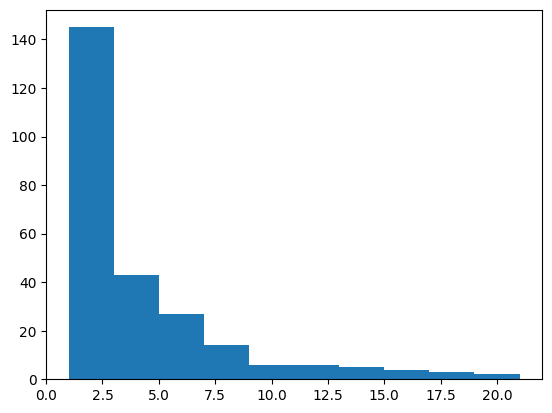

In [20]:
# plt.hist(max_balances_10_4_df_groupby)
# plt.show()

In [25]:
max_balances_10_4_df_groupby[0]
+.value_counts()

17    1
2     1
Name: STATUS, dtype: int64

In [44]:
len(status_3_borrower_over10)

78

In [29]:
borrowers_min_10_loans_df['STATUS'].value_counts()
# .apply(lambda x: x .nlargest(5, ))

C    23331
0    10787
X     7029
1      382
5      150
2       57
3       22
4       11
Name: STATUS, dtype: int64

In [12]:
borrowers_min_10_loans_df.head()

,ID,MONTHS_BALANCE,STATUS,DAYS_EMPLOYED,NAME_FAMILY_STATUS,DAYS_BIRTH,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE
37,5054354,-11,C,-5416,Civil marriage,-22187,House / apartment,Secondary / secondary special,Laborers,99000.0,State servant
38,5054354,-34,C,-5416,Civil marriage,-22187,House / apartment,Secondary / secondary special,Laborers,99000.0,State servant
39,5054354,-8,C,-5416,Civil marriage,-22187,House / apartment,Secondary / secondary special,Laborers,99000.0,State servant
40,5054354,-6,C,-5416,Civil marriage,-22187,House / apartment,Secondary / secondary special,Laborers,99000.0,State servant
41,5054354,-32,C,-5416,Civil marriage,-22187,House / apartment,Secondary / secondary special,Laborers,99000.0,State servant


In [30]:
# under 10 loans df

testing2_df_multi_loan_lessthan_10 = []
k = testing2_df['ID'].value_counts().keys().tolist()

counter= 0
for x in testing2_df['ID'].value_counts():
    counter += 1

    if x < 10:
        # print(x, k[counter - 1])
        testing2_df_multi_loan_lessthan_10.append( k[counter - 1])
len(testing2_df_multi_loan_lessthan_10)       
# testing2_df_multi_loan.info()

29110

In [31]:
testing2_df_multi_loan_lessthan_10_df = testing2_df.query("ID in @testing2_df_multi_loan_lessthan_10")
testing2_df_multi_loan_lessthan_10_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113747 entries, 0 to 155515
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   113747 non-null  int64  
 1   MONTHS_BALANCE       113747 non-null  int64  
 2   STATUS               113747 non-null  object 
 3   DAYS_EMPLOYED        113747 non-null  int64  
 4   NAME_FAMILY_STATUS   113747 non-null  object 
 5   DAYS_BIRTH           113747 non-null  int64  
 6   NAME_HOUSING_TYPE    113747 non-null  object 
 7   NAME_EDUCATION_TYPE  113747 non-null  object 
 8   OCCUPATION_TYPE      78778 non-null   object 
 9   AMT_INCOME_TOTAL     113747 non-null  float64
 10  NAME_INCOME_TYPE     113747 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 10.4+ MB


In [32]:

print(len(testing2_df_multi_loan_lessthan_10_df[testing2_df_multi_loan_lessthan_10_df['STATUS'] =='5'])
, len(borrowers_min_10_loans_df[borrowers_min_10_loans_df['STATUS'] =='5']))
print(testing2_df_multi_loan_lessthan_10_df['STATUS'].value_counts())



183 150
0    47313
C    42724
X    21911
1     1441
5      183
2      115
3       35
4       25
Name: STATUS, dtype: int64


In [34]:
less_5_C = testing2_df_multi_loan_lessthan_10_df[testing2_df_multi_loan_lessthan_10_df['STATUS'] =='5']
len(less_5_C['ID'].unique())

more_5_C = borrowers_min_10_loans_df[borrowers_min_10_loans_df['STATUS'] =='5']
len(more_5_C['ID'].unique())

print(len(less_5_C['ID'].unique()), "over 10: ", len(more_5_C['ID'].unique()) )

87 over 10:  34


In [32]:
less_5_C['ID'].nunique()


87

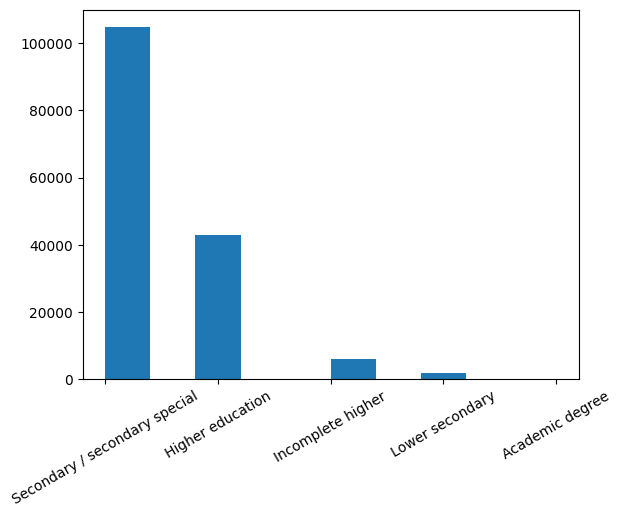

In [40]:
t2 = testing2_df["NAME_EDUCATION_TYPE"]
t2
plt.hist(t2, bins = 10)
plt.xticks(rotation=30)

plt.show()

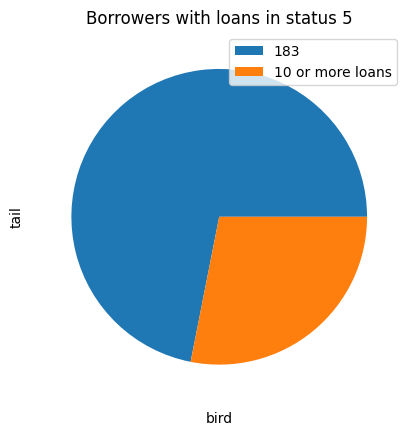

In [37]:
plt.pie([len(less_5_C['ID'].unique()), len(more_5_C['ID'].unique())])
plt.title("Borrowers with loans in status 5")
plt.legend([len(less_5_C), len(more_5_C)])
plt.xlabel("bird")
plt.ylabel("tail")

plt.show()

![Screen Shot 2023-02-14 at 12.00.37 PM](Screen%20Shot%202023-02-14%20at%2012.00.37%20PM.png)


In [13]:
borrowers_min_10_loans_C_loans_df = borrowers_min_10_loans_df[borrowers_min_10_loans_df['STATUS'] == 'C']
# print(borrowers_min_10_loans_C_loans_df.info())
# print(borrowers_min_10_loans_C_loans_df.head())
print(borrowers_min_10_loans_C_loans_df['NAME_EDUCATION_TYPE'].value_counts())

print(15419/23331)
print(6755/23331)

Secondary / secondary special    15419
Higher education                  6755
Incomplete higher                  882
Lower secondary                    270
Academic degree                      5
Name: NAME_EDUCATION_TYPE, dtype: int64
0.6608803737516609
0.2895289528952895


In [ ]:
borrowers_min_10_loans_C_loans_df

In [83]:
print("Number of borrowers (10 or more loans) in each status category", borrowers_min_10_loans_df['STATUS'].value_counts())

print("Number of borrowers (10 or more loans) by ed level",borrowers_min_10_loans_df['NAME_EDUCATION_TYPE'].value_counts())

t3 = borrowers_min_10_loans_df["NAME_EDUCATION_TYPE"].value_counts()
t3_keys = borrowers_min_10_loans_df["NAME_EDUCATION_TYPE"].value_counts().keys().tolist()

count= 0
for x in t3:
    print(t3_keys[count], ': ', x/41769)
    count += 1

#This shows that lower secondary borrowers are not repeat borrowers. It also shows that secondary ed level borrowers are slightly less represented in repeat borrowers than they are among borrowers overall

print("Number of higher education borrowers that ".28 * 41769)

Number of borrowers (10 or more loans) in each status category C    23331
0    10787
X     7029
1      382
5      150
2       57
3       22
4       11
Name: STATUS, dtype: int64
Number of borrowers (10 or more loans) by ed level Secondary / secondary special    27846
Higher education                 11847
Incomplete higher                 1595
Lower secondary                    471
Academic degree                     10
Name: NAME_EDUCATION_TYPE, dtype: int64

Secondary / secondary special :  0.6666666666666666
Higher education :  0.2836314012784601
Incomplete higher :  0.03818621465680289
Lower secondary :  0.011276305393952453
Academic degree :  0.00023941200411788647
11695.320000000002


In [19]:
t2 = testing2_df["NAME_EDUCATION_TYPE"].value_counts()
t2_keys = testing2_df["NAME_EDUCATION_TYPE"].value_counts().keys().tolist()
count= 0
print()
for x in t2:
    print(t2_keys[count], ': ', x/155516)
    count += 1


Secondary / secondary special :  0.6736284369453946
Higher education :  0.2753928856194861
Incomplete higher :  0.03879343604516577
Lower secondary :  0.011169268756912471
Academic degree :  0.0010159726330409733


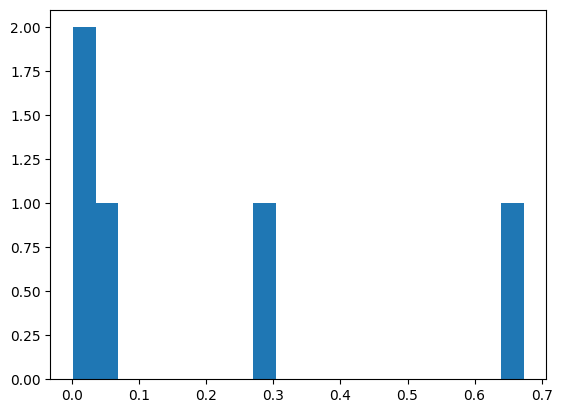

In [28]:
t2 = testing2_df["NAME_EDUCATION_TYPE"].value_counts()/155516
t2
plt.hist(t2,bins=20)
plt.show()

In [7]:
new_final = testing2_df.to_csv('new_finals.csv')

In [18]:
testing2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155516 entries, 0 to 155515
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   155516 non-null  int64  
 1   MONTHS_BALANCE       155516 non-null  int64  
 2   STATUS               155516 non-null  object 
 3   DAYS_EMPLOYED        155516 non-null  int64  
 4   NAME_FAMILY_STATUS   155516 non-null  object 
 5   DAYS_BIRTH           155516 non-null  int64  
 6   NAME_HOUSING_TYPE    155516 non-null  object 
 7   NAME_EDUCATION_TYPE  155516 non-null  object 
 8   OCCUPATION_TYPE      107666 non-null  object 
 9   AMT_INCOME_TOTAL     155516 non-null  float64
 10  NAME_INCOME_TYPE     155516 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 14.2+ MB


43.58985009687617
43.829875749738534


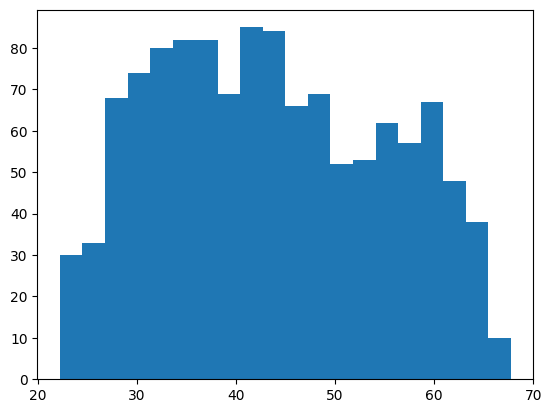

In [15]:
low_ed_age = (longest_balance['DAYS_BIRTH']/365)*-1
print((longest_balance['DAYS_BIRTH'].mean()/365)*-1)
plt.hist(low_ed_age, bins=20)
plt.show

print((final['DAYS_BIRTH'].mean()/365)*-1)
ed_age_all = final['DAYS_BIRTH']/365*-1
# plt.hist(ed_age_all, bins=6)
# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

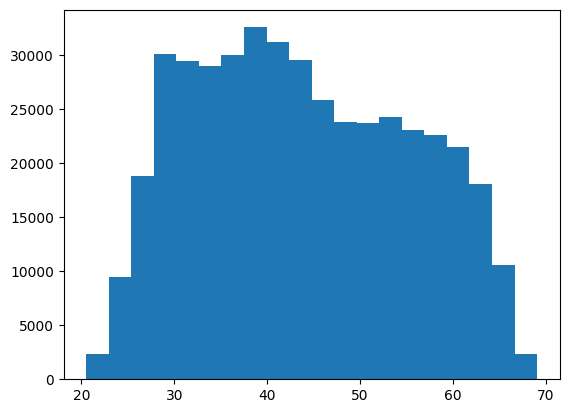

In [16]:
plt.hist(ed_age_all, bins=20)
plt.show

In [30]:
# A very high percentage of borrowers in pct_0_group = longest_balance.groupby('STATUS')['STATUS'].count()[0]/len(longest_balance)

pct_0_group

0.6799007444168734

In [32]:
final.groupby('STATUS')['STATUS'].count()

STATUS
0    76566
1     2281
2      192
3       59
4       37
5      356
C    88564
X    41660
Name: STATUS, dtype: int64

In [31]:
final.groupby('STATUS')['STATUS'].count()[0]/len(final)

0.17458619974142472

In [46]:
#of the debts that were written off (proved to be bad loans),73% had lower secondary or secondary education 

longestOverdue = final[final['STATUS']=='5' ]
print(longestOverdue.groupby('NAME_EDUCATION_TYPE')['STATUS'].count())

ed_of_writeoffs = 260/356

print(ed_of_writeoffs)

NAME_EDUCATION_TYPE
Higher education                  82
Incomplete higher                 14
Lower secondary                    3
Secondary / secondary special    257
Name: STATUS, dtype: int64
0.7303370786516854


In [49]:
#the two lowest education categories make up a higher percentage of borrowers in status 5 than in status 0 (69%)

shortestOverdue = final[final['STATUS']=='0' ]

print(shortestOverdue.groupby('NAME_EDUCATION_TYPE')['STATUS'].count())

ed_of_current = (52625 + 737)/76566

print(ed_of_writeoffs, ed_of_current)

NAME_EDUCATION_TYPE
Academic degree                     47
Higher education                 20562
Incomplete higher                 2595
Lower secondary                    737
Secondary / secondary special    52625
Name: STATUS, dtype: int64
0.7303370786516854 0.6969412010552987


In [57]:
statuses = final['STATUS'].unique()
statuses = statuses[0:-1]
statuses
for x in statuses:
    check_overdue = final[final['STATUS']==x ]
    temp_group = check_overdue.groupby('NAME_EDUCATION_TYPE')['STATUS'].count()
    print(x, '\n', temp_group)
    # ed_count = temp_group[3]+temp_group[4]/len(temp_group)
    # print('the percentage of borrowers with lower secondary or secondary in the {} status is {}'.format(x, ed_count))

X 
 NAME_EDUCATION_TYPE
Academic degree                     35
Higher education                 11221
Incomplete higher                 1359
Lower secondary                    406
Secondary / secondary special    28639
Name: STATUS, dtype: int64
0 
 NAME_EDUCATION_TYPE
Academic degree                     47
Higher education                 20562
Incomplete higher                 2595
Lower secondary                    737
Secondary / secondary special    52625
Name: STATUS, dtype: int64
C 
 NAME_EDUCATION_TYPE
Academic degree                     73
Higher education                 23787
Incomplete higher                 3020
Lower secondary                    849
Secondary / secondary special    60835
Name: STATUS, dtype: int64
1 
 NAME_EDUCATION_TYPE
Academic degree                     1
Higher education                  652
Incomplete higher                  73
Lower secondary                    24
Secondary / secondary special    1531
Name: STATUS, dtype: int64
5 
 NAME_EDUCATION_TY

In [66]:
#check on the number of people in the family for lower ed groups. See if fam_members - children is 2. If so you can assume that their are two incomes. See if that group has a higher or lower percentage of 2-parent families.

longest_balance1 = enriched_demographics_client_df[['ID', 'CNT_FAM_MEMBERS','CNT_CHILDREN']].copy()
longest_balance2 = longest_balance1[longest_balance1[]]

,ID,CNT_FAM_MEMBERS,CNT_CHILDREN
0,5008804,2,0
1,5008805,2,0
2,5008806,2,0
3,5008808,1,0
4,5008809,1,0
...,...,...,...
438552,6840104,1,0
438553,6840222,1,0
438554,6841878,1,0
438555,6842765,2,0


In [65]:
longest_balance.columns

Index(['ID_x', 'MONTHS_BALANCE', 'STATUS', 'DAYS_EMPLOYED',
       'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'NAME_HOUSING_TYPE', 'ID_y',
       'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE'],
      dtype='object')

In [ ]:
final

Keren
time at a job ranked by occupation
2 highest occupations
correlate those


In [15]:
larger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155516 entries, 0 to 155515
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   155516 non-null  int64  
 1   FLAG_OWN_CAR         155516 non-null  object 
 2   FLAG_OWN_REALTY      155516 non-null  object 
 3   FLAG_MOBIL           155516 non-null  int64  
 4   FLAG_WORK_PHONE      155516 non-null  int64  
 5   FLAG_PHONE           155516 non-null  int64  
 6   FLAG_EMAIL           155516 non-null  int64  
 7   CODE_GENDER          155516 non-null  object 
 8   CNT_CHILDREN         155516 non-null  int64  
 9   CNT_FAM_MEMBERS      155516 non-null  int64  
 10  DAYS_EMPLOYED        155516 non-null  int64  
 11  NAME_FAMILY_STATUS   155516 non-null  object 
 12  DAYS_BIRTH           155516 non-null  int64  
 13  NAME_HOUSING_TYPE    155516 non-null  object 
 14  NAME_EDUCATION_TYPE  155516 non-null  object 
 15  OCCUPATION_TYPE  

In [22]:
larger.groupby('OCCUPATION_TYPE')['DAYS_EMPLOYED'].mean().sort_values(ascending=True)

OCCUPATION_TYPE
Medicine staff          -4388.467404
High skill tech staff   -3238.284366
Private service staff   -3196.659389
Core staff              -3040.912067
Managers                -2931.482036
Laborers                -2858.252786
Realty agents           -2697.184615
Secretaries             -2684.372699
Accountants             -2660.494147
Cooking staff           -2510.583271
Cleaning staff          -2488.423971
Low-skill Laborers      -2273.505960
HR staff                -2089.819767
Sales staff             -2049.883169
Drivers                 -2043.084689
Waiters/barmen staff    -1926.144289
Security staff          -1878.551902
IT staff                -1674.060071
Name: DAYS_EMPLOYED, dtype: float64

In [26]:
keren = larger.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False)
keren

OCCUPATION_TYPE
Managers                 281360.151745
Realty agents            245353.846154
IT staff                 223304.946996
Drivers                  210294.836814
Accountants              208585.494327
Private service staff    202303.493450
High skill tech staff    198136.741114
Core staff               192437.585815
HR staff                 191145.348837
Laborers                 181633.900273
Security staff           175230.606181
Sales staff              174029.580282
Medicine staff           166411.017347
Secretaries              161889.570552
Waiters/barmen staff     154776.553106
Cleaning staff           149720.393560
Cooking staff            144919.070632
Low-skill Laborers       130505.960265
Name: AMT_INCOME_TOTAL, dtype: float64

In [33]:
print("High skill tech staff: ", round(keren['High skill tech staff'],2), '\n', "Medicine staff: ", keren['Medicine staff' ])

High skill tech staff:  198136.74 
 Medicine staff:  166411.01734654975


In [41]:

keren_df = larger[(larger['OCCUPATION_TYPE'] == 'High skill tech staff') | (larger['OCCUPATION_TYPE'] == 'Medicine staff')]

keren_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11604 entries, 424 to 155508
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   11604 non-null  int64  
 1   FLAG_OWN_CAR         11604 non-null  object 
 2   FLAG_OWN_REALTY      11604 non-null  object 
 3   FLAG_MOBIL           11604 non-null  int64  
 4   FLAG_WORK_PHONE      11604 non-null  int64  
 5   FLAG_PHONE           11604 non-null  int64  
 6   FLAG_EMAIL           11604 non-null  int64  
 7   CODE_GENDER          11604 non-null  object 
 8   CNT_CHILDREN         11604 non-null  int64  
 9   CNT_FAM_MEMBERS      11604 non-null  int64  
 10  DAYS_EMPLOYED        11604 non-null  int64  
 11  NAME_FAMILY_STATUS   11604 non-null  object 
 12  DAYS_BIRTH           11604 non-null  int64  
 13  NAME_HOUSING_TYPE    11604 non-null  object 
 14  NAME_EDUCATION_TYPE  11604 non-null  object 
 15  OCCUPATION_TYPE      11604 non-nu

In [42]:
keren_df.corr()

,ID,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_EMPLOYED,DAYS_BIRTH,AMT_INCOME_TOTAL,MONTHS_BALANCE
ID,1.000000,NaN,0.141847,0.058817,-0.112081,-0.028238,-0.052245,-0.048912,0.016142,-0.012711,-0.012270
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.141847,NaN,1.000000,0.346698,-0.066783,0.031351,0.053874,0.031595,0.083409,-0.063707,-0.005584
FLAG_PHONE,0.058817,NaN,0.346698,1.000000,0.056340,0.095823,0.054034,0.043158,0.072814,-0.042822,-0.015172
FLAG_EMAIL,-0.112081,NaN,-0.066783,0.056340,1.000000,-0.081779,-0.085087,0.031744,-0.001120,-0.032820,-0.016513
CNT_CHILDREN,-0.028238,NaN,0.031351,0.095823,-0.081779,1.000000,0.901082,0.070914,0.373779,-0.049545,-0.008026
CNT_FAM_MEMBERS,-0.052245,NaN,0.053874,0.054034,-0.085087,0.901082,1.000000,0.062127,0.285120,-0.061510,-0.025556
DAYS_EMPLOYED,-0.048912,NaN,0.031595,0.043158,0.031744,0.070914,0.062127,1.000000,0.369971,0.026410,0.029692
DAYS_BIRTH,0.016142,NaN,0.083409,0.072814,-0.001120,0.373779,0.285120,0.369971,1.000000,0.018057,0.019192
AMT_INCOME_TOTAL,-0.012711,NaN,-0.063707,-0.042822,-0.032820,-0.049545,-0.061510,0.026410,0.018057,1.000000,-0.017708


In [45]:
single_ids = []
single_occupations =[]
for value, row in keren_df.iterrows():
    single_check = row['CNT_FAM_MEMBERS'] - row['CNT_CHILDREN']
    if single_check == 1:
        single_ids.append(row['ID'])
        single_occupations.append(row['OCCUPATION_TYPE'])
        
print(len(single_ids), len(single_occupations))

2357 2357


In [49]:
single_ids_larger = []
single_occupations_larger =[]
for value, row in larger.iterrows():
    single_check = row['CNT_FAM_MEMBERS'] - row['CNT_CHILDREN']
    if single_check == 1:
        single_ids_larger.append(row['ID'])
        single_occupations_larger.append(row['OCCUPATION_TYPE'])
        
print(len(single_ids_larger), len(single_occupations_larger))

34090 34090


In [50]:
set(single_occupations_larger)

{'Accountants',
 'Cleaning staff',
 'Cooking staff',
 'Core staff',
 'Drivers',
 'HR staff',
 'High skill tech staff',
 'IT staff',
 'Laborers',
 'Low-skill Laborers',
 'Managers',
 'Medicine staff',
 'Private service staff',
 'Realty agents',
 'Sales staff',
 'Secretaries',
 'Security staff',
 'Waiters/barmen staff',
 nan}

In [52]:
len(set(single_ids_larger))

7424